In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter
import os

In [2]:
def load_video(fn):
    import skvideo
    import skvideo.io
    videodata = skvideo.io.vread(fn)
    return videodata

In [3]:
indir = './Data/haa500_v1_1_no_bg/video'
folders = os.listdir(indir) ; folders.sort()

videos = []
for folder in folders:
    cont = [file for file in os.listdir(os.path.join(indir,folder)) if file.endswith('.mp4')]
    videos.append(cont)
    
print(len(folders))
print(np.array([len(folder) for folder in videos]))

39
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0]


In [42]:
[f'{i:02d} | {folder}' for i,folder in enumerate(folders)]

['00 | ALS_IceBucket_Challenge',
 '01 | CPR',
 '02 | abseiling',
 '03 | add_new_car_tire',
 '04 | adjusting_glasses',
 '05 | air_drumming',
 '06 | air_guitar',
 '07 | air_hocky',
 '08 | alligator_wrestling',
 '09 | applauding',
 '10 | applying_cream',
 '11 | archery',
 '12 | arm_wave',
 '13 | arm_wrestling',
 '14 | atlatl_throw',
 '15 | axe_throwing',
 '16 | backflip',
 '17 | backward_roll',
 '18 | badminton_overswing',
 '19 | badminton_serve',
 '20 | badminton_underswing',
 '21 | balancebeam_flip',
 '22 | balancebeam_jump',
 '23 | balancebeam_rotate',
 '24 | balancebeam_spin',
 '25 | balancebeam_walk',
 '26 | balloon_animal',
 '27 | bandaging',
 '28 | base_jumping',
 '29 | baseball_bunt',
 '30 | baseball_catch_catcher',
 '31 | baseball_catch_flyball',
 '32 | baseball_catch_groundball',
 '33 | baseball_pitch',
 '34 | baseball_run',
 '35 | baseball_swing',
 '36 | basketball_dribble',
 '37 | basketball_dunk',
 '38 | basketball_hookshot']

In [32]:
f = 9
v = 1

fn_seg = os.path.join(indir,folders[f],videos[f][v])
fn_orig = os.path.join(indir.replace('haa500_v1_1_no_bg','haa500_v1_1'),folders[f],videos[f][v])

In [6]:
video_stdev = np.zeros((5,10))

In [24]:
# for f in tqdm(range(5)):
#     for v in range(10):
#         fn_seg = os.path.join(indir,folders[f],videos[f][v])
#         video_data_seg = load_video(fn_seg)
#         stdev = video_data_seg.mean(axis=-1).std(axis=0).mean()
#         video_stdev[f,v] = stdev

In [26]:
#video_stdev.round()

In [58]:
#0,0 - good
#0,1 - bad
#0,2 - bad
#1,1 - cutout three people
#1,2 - good
#1,2 - good, manekin in vid
#9,0 - good
#9,1 - meh
#9,2 - good, two people applauding
#9,3 crowd
#

./Data/haa500_v1_1_no_bg/video/axe_throwing/axe_throwing_013.mp4


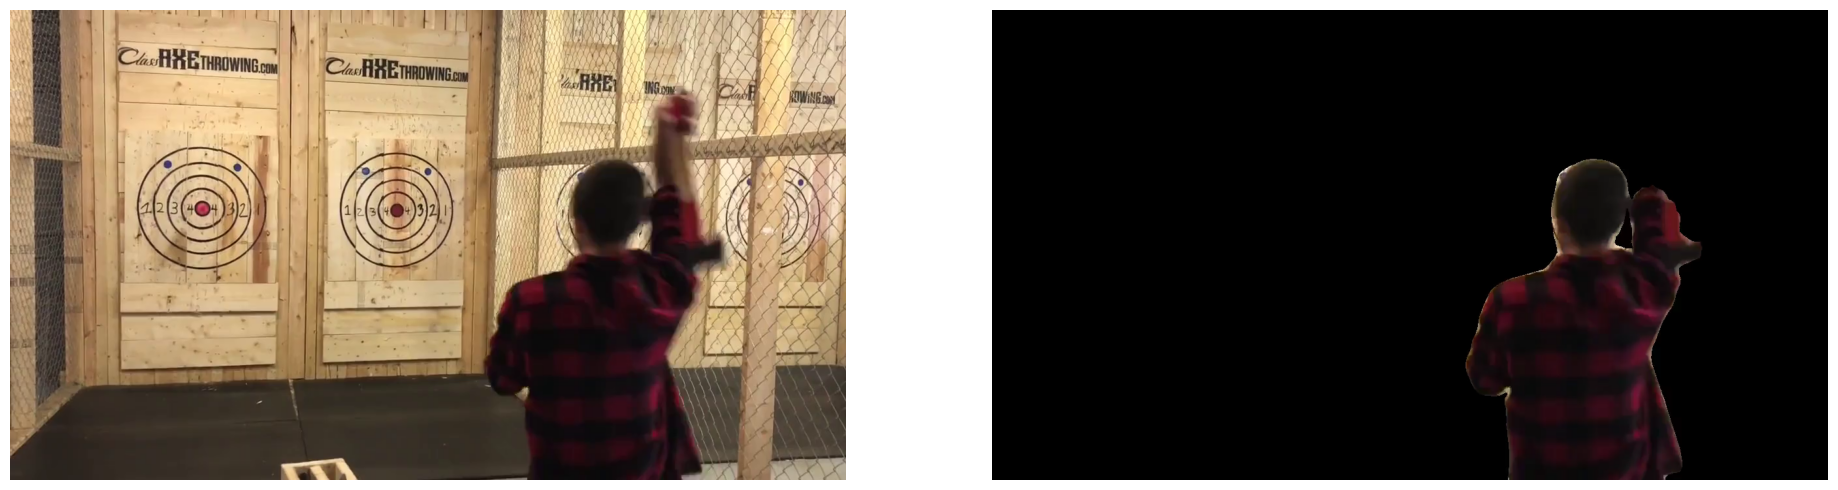

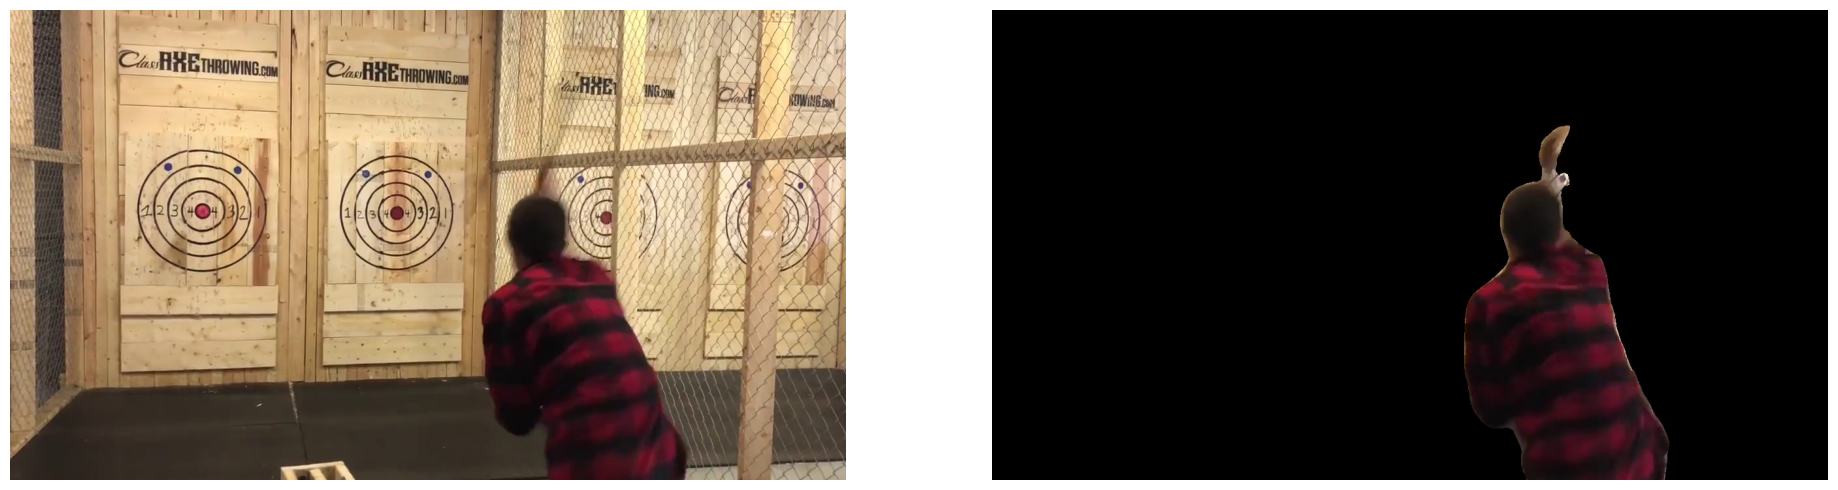

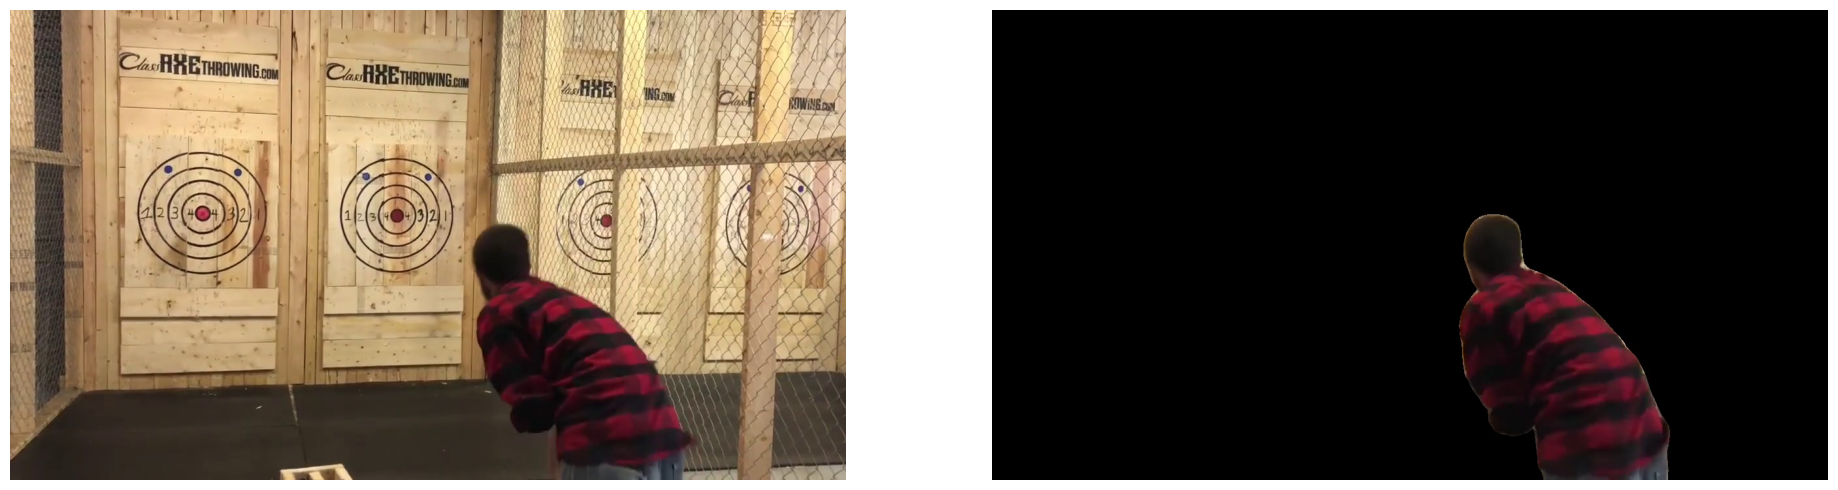

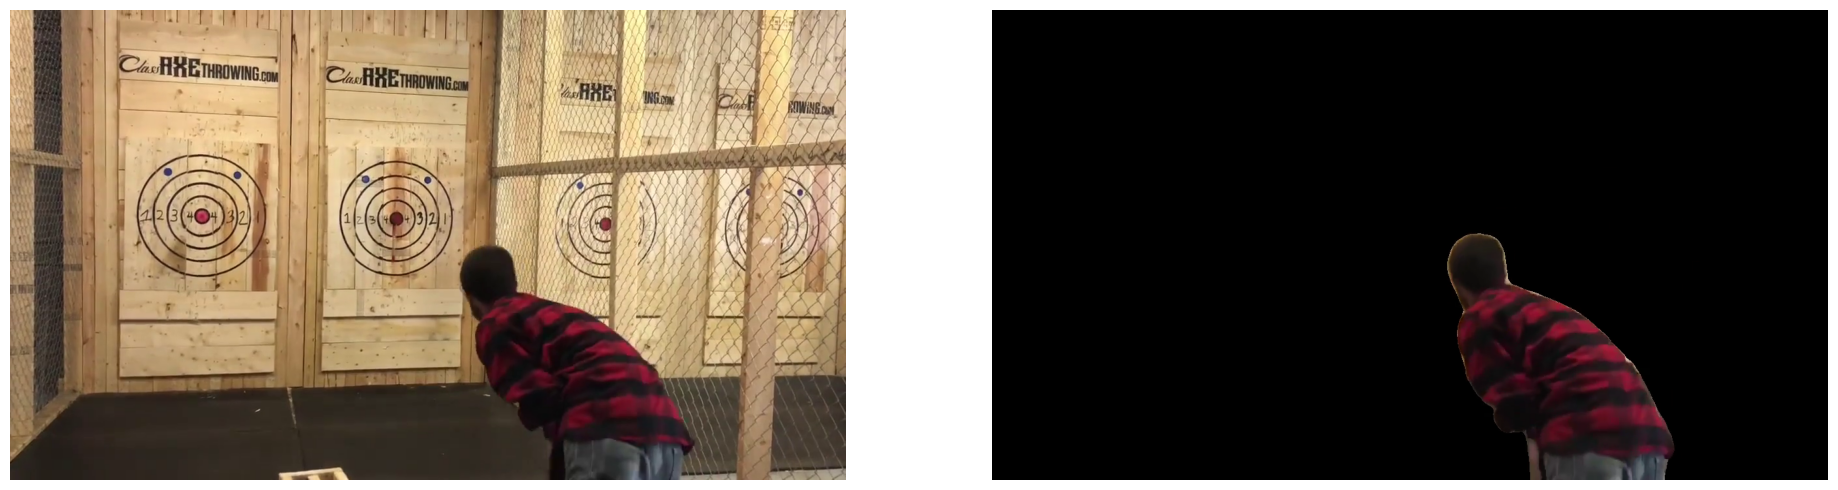

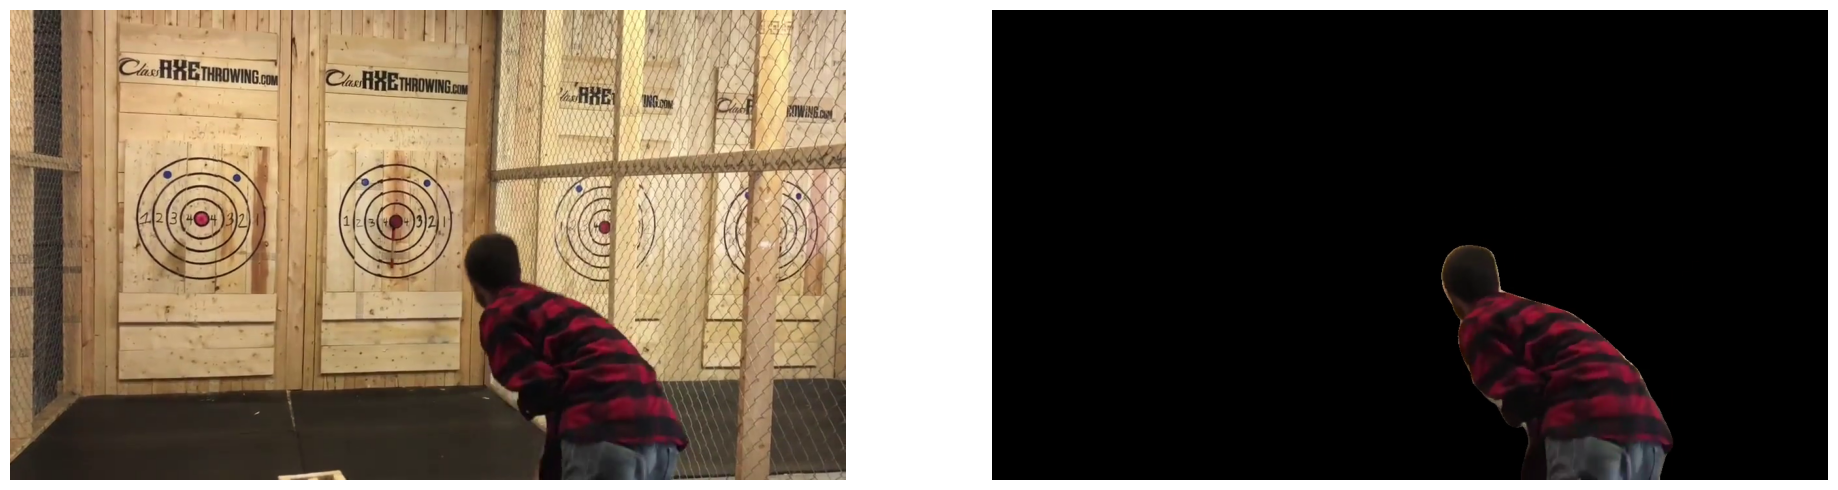

In [76]:
f = 15
v = 0

fn_seg = os.path.join(indir,folders[f],videos[f][v])
fn_orig = os.path.join(indir.replace('haa500_v1_1_no_bg','haa500_v1_1'),folders[f],videos[f][v])
#fn_orig = os.path.join(indir.replace('haa500_v1_1','haa500_v1_1'),folders[f],videos[f][v])

print(fn_seg)

video_data = load_video(fn_orig)
video_data_seg = load_video(fn_seg)

#for frame in range(5):
for frame in np.linspace(0,video_data.shape[0]-1,5).astype(int):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.imshow(video_data[frame,:,:,:]);plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(video_data_seg[frame,:,:,:]);plt.axis('off')
    plt.tight_layout()